In [1]:
from google.colab import drive

drive.mount("/content/drive")

# Reads from the two csv files that we will use as the weapon and
# enemy data.
def get_data(pathName, remove_rowname=False):
    options = []
    with open(pathName, "r") as f:
      head = f.readline()
      line = f.readline()
      while line != '':
        inter = line.split(",")
        inter[-1] = inter[-1].replace("\n", "")
        lowerbound = 1
        if remove_rowname == True:
          inter = inter[1:]
          lowerbound = 0
        for i in range(lowerbound, len(inter)):
          inter[i] = float(inter[i])
        options.append(tuple(inter))
        line = f.readline()
    return options

tst = get_data("drive/My Drive/AIFinal/enemy_units.csv", remove_rowname=True)


Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: 'drive/My Drive/AIFinal/enemy_units.csv'

Generation 0: Best Fitness = 1864.0
Generation 1: Best Fitness = 2178.0
Generation 2: Best Fitness = 2368.0
Generation 3: Best Fitness = 2368.0
Generation 4: Best Fitness = 2368.0
Generation 5: Best Fitness = 2368.0
Generation 6: Best Fitness = 2368.0
Generation 7: Best Fitness = 2368.0
Generation 8: Best Fitness = 2368.0
Generation 9: Best Fitness = 2368.0
Generation 10: Best Fitness = 2368.0
Generation 11: Best Fitness = 2368.0
Generation 12: Best Fitness = 2368.0
Generation 13: Best Fitness = 2368.0
Generation 14: Best Fitness = 2368.0
Generation 15: Best Fitness = 2368.0
Generation 16: Best Fitness = 2368.0
Generation 17: Best Fitness = 2368.0
Generation 18: Best Fitness = 2368.0
Generation 19: Best Fitness = 2368.0
Generation 20: Best Fitness = 2368.0
Generation 21: Best Fitness = 2368.0
Generation 22: Best Fitness = 2368.0
Generation 23: Best Fitness = 2368.0
Generation 24: Best Fitness = 2368.0
Generation 25: Best Fitness = 2368.0
Generation 26: Best Fitness = 2368.0
Generation 

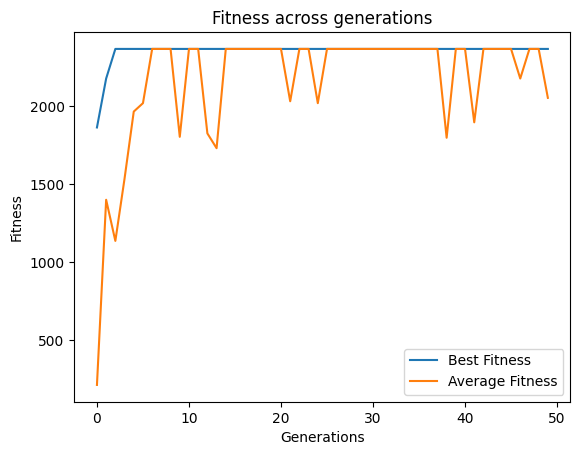

In [ ]:
import random
from math import ceil
from random import randrange
import matplotlib.pyplot as plt
import numpy as np

# Define the SquadLoadout class to represent each loadout
class SquadLoadout:
    def __init__(self, weapons):
        # Initialize with a set of weapons
        self.weapons = weapons
        self.fitness = 0  # Fitness score starts at 0

    def calculate_fitness(self):
            self.fitness = 0
            # More varied and numerous test cases
            test_cases = tst
            #test_cases = [(3, 5, 1), (4, 3, 2), (5, 4, 6), (7, 3, 11), (6, 6, 3), (8, 2, 4), (4, 7, 2), (3, 8, 1)]
            for weapon in self.weapons:
                for test in test_cases:
                    total_wounds_dealt = ceil(weapon[1] * 0.5) * self.calculate_wounds(weapon[2], test[0]) * ((test[1] - 1 + weapon[3]) / 2) * weapon[4]
                    total_models_killed = total_wounds_dealt // test[2]
                    if (test[1] > 6):
                      total_models_killed *= 10       # Scales attr if test case toughness > 6
                    self.fitness += total_models_killed

    def mutate(self, mutation_rate, weapon_options):
        # Mutate the loadout with a given probability
        for i in range(len(self.weapons)):
            if random.random() < mutation_rate:
                old_weapon = self.weapons[i]
                self.weapons[i] = random.choice(weapon_options)
                #print(f"Weapon mutated from {old_weapon} to {self.weapons[i]}")  # Debugging statement

    @staticmethod
    def calculate_wounds(strength, toughness):
        # Calculate wounds based on weapon strength and enemy toughness
        if strength >= toughness * 2:
            return 5 / 6
        elif strength > toughness:
            return 4 / 6
        elif strength == toughness:
            return 3 / 6
        elif strength < toughness:
            return 2 / 6
        elif strength * 2 <= toughness:
            return 1 / 6

    @staticmethod
    def crossover(parent1, parent2):
      # Perform crossover between two parent loadouts
      crossover_point = random.randint(1, len(parent1.weapons) - 2)
      child1_weapons = parent1.weapons[:crossover_point] + parent2.weapons[crossover_point:]
      child2_weapons = parent2.weapons[:crossover_point] + parent1.weapons[crossover_point:]
      #print(f"Crossover Point: {crossover_point}")  # Debugging statement
      #print(f"Child 1 Weapons: {child1_weapons}")  # Debugging statement
      #print(f"Child 2 Weapons: {child2_weapons}")  # Debugging statement
      return SquadLoadout(child1_weapons), SquadLoadout(child2_weapons)

# Function to initialize the population with random loadouts
def initialize_population(population_size, weapon_options):
    population = []
    for _ in range(population_size):
        weapons = random.choices(weapon_options, k=4)  # Each loadout has 4 weapons
        population.append(SquadLoadout(weapons))
    return population

# Tournament selection function for choosing parents
def tournament_selection(population, tournament_size):
    selected_parents = []
    for _ in range(len(population)):
        tournament = random.sample(population, tournament_size)
        winner = max(tournament, key=lambda loadout: loadout.fitness)
        selected_parents.append(winner)
    return selected_parents

# Function to create a new generation from selected parents
def create_new_generation(selected_parents, mutation_rate, weapon_options, crossover_rate):
    new_generation = []
    while len(new_generation) < len(selected_parents):
        parent1, parent2 = random.sample(selected_parents, 2)
        # Perform crossover based on crossover rate
        if random.random() < crossover_rate:
            child1, child2 = SquadLoadout.crossover(parent1, parent2)
        else:
            child1, child2 = SquadLoadout(parent1.weapons[:]), SquadLoadout(parent2.weapons[:])
        child1.mutate(mutation_rate, weapon_options)
        child2.mutate(mutation_rate, weapon_options)
        new_generation.extend([child1, child2])
    return new_generation

def genetic_algorithm(population_size, weapon_options, max_generations, mutation_rate, crossover_rate):
    population = initialize_population(population_size, weapon_options)
    bestFitnesses = np.array([])
    averageFitnesses = np.array([])

    for generation in range(max_generations):
        # Calculate fitness for each loadout in the population
        for loadout in population:
            loadout.calculate_fitness()

        # Print the fitness of each loadout for debugging
        #for loadout in population:
            #print(f"Loadout: {loadout.weapons}, Fitness: {loadout.fitness}")

        best_fitness = max(population, key=lambda loadout: loadout.fitness).fitness
        average_fitness = np.mean(loadout.fitness)
        bestFitnesses = np.append(bestFitnesses, best_fitness)
        averageFitnesses = np.append(averageFitnesses, average_fitness)
        print(f"Generation {generation}: Best Fitness = {best_fitness}")
        # Selection
        selected_parents = tournament_selection(population, tournament_size=5)

        # Crossover and mutation to create new generation
        population = create_new_generation(selected_parents, mutation_rate, weapon_options, crossover_rate)

        # Print out the best fitness score in each generation
        #best_fitness = max(population, key=lambda loadout: loadout.fitness).fitness
        #print(f"Generation {generation}: Best Fitness = {best_fitness}")

    # Find and return the best loadout in the final population
    plt.plot(bestFitnesses, label="Best Fitness")
    plt.plot(averageFitnesses, label="Average Fitness")
    plt.title("Fitness across generations")
    plt.legend()
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    print(averageFitnesses)
    best_loadout = max(population, key=lambda loadout: loadout.fitness)
    return best_loadout


# Example usage
#weapon_options = [('Bolter', 4, 4, 0, 1), ('Plasma Gun', 2, 7, -3, 1), ('Melta Gun', 1, 8, -4, 3.5), ('Heavy Bolter', 3, 5, -1, 2)]
weapon_options = get_data("drive/My Drive/AIFinal/weapon.csv")
best_squad_loadout = genetic_algorithm(1000, weapon_options, 50, 0.05, 0.7)

print(f"The best squad loadout is: {best_squad_loadout.weapons}")


### Explaination of the Fitness Function

Since the goal of this program is to find the ideal loadout of a unit of WH40k space marines, it might be helpful to understand how we calculate that.

***Note, this is based on WH40k 9th edition rules***

## Combat Mechanics

Whenever a weapon is fired in WH40k, a series of steps are taken to determine whether the weapon hits the target, whether it "wounds" the target, and whether the weapon ignores the target's armor.

The first stage, called "rolling to hit" is determined by the unit's Ballistics Skill. However, since we're using the same unit every time, we can ignore this and simply calculate the average hit rate of a space marine (4/6) and pass it to the fitness function.

The second stage, called "rolling to wound", determines whether a weapon theoretically could wound a target. To calculate this, we compare the strength value of the weapon (stored in index 2 of a weapon tuple) and the toughness of the target (stored in index 0 of the test tuple). From here, we follow simple if-then logic.

![wounds](https://images.beastsofwar.com/2017/05/Wound-Chart.jpg "Wounds Table")

The table gives us the dice roll that will result in a success, which we simply convert to probability for the fitness function (e.g. a 2+ has a 5/6 probability of success)

Finally, we must calculate whether or not armor prevents the damage from occuring, and calculating the total damage done. For simplicity, we focus on whether or not the armor save fails. This is given by the function (Save + AP -1) / 6, where Save is the armor save for a given model (test index 2) and the armor penetration characteristic of the weapon (weapon index 3). Finally, we can multiply that result by the damage of the weapon (weapon index 4).

## Implementation

I've implemented this process to occur for every weapon loadout, calculating the total models killed by weapons and the total amount of damage done. This is where we run into a snag. Certain weapons (such as the Flamer) are designed to kill many small models, whereas others (such as the Lascannon) are designed to take down vehicles with higher value. To compensate, vehicles have a weight applied to the "total models killed" score during the calculations.

A given chromosomes fitness is identified by the total number of models killed.



In [ ]:
from google.colab import drive
import pandas as pd
drive.mount("/content/drive")

data = pd.read_csv("drive/My Drive/AIFinal/weapon.csv")
#def get_data():
#  with open("drive/My Drive/AIFinal/weapons.csv", "r") as f:
#    vals = f.read()

#  print(vals)
def genetic_algorithm(population_size, weapon_options, max_generations, mutation_rate, crossover_rate, elitism_count):
    population = initialize_population(population_size, weapon_options)

    for generation in range(max_generations):
        # Calculate fitness for each loadout
        for loadout in population:
            loadout.calculate_fitness()

        # Sort population by fitness in descending order
        population.sort(key=lambda loadout: loadout.fitness, reverse=True)

        # Preserve the elite individuals
        new_generation = population[:elitism_count]

        # Fill the rest of the generation through selection, crossover, and mutation
        selected_parents = tournament_selection(population, tournament_size=5)
        children = create_new_generation(selected_parents, mutation_rate, weapon_options, crossover_rate)
        new_generation.extend(children[:population_size - elitism_count])

        # Replace old generation with new generation
        population = new_generation

        # Print the best fitness
        best_fitness = population[0].fitness
        print(f"Generation {generation}: Best Fitness = {best_fitness}")

    # Return the best loadout
    return population[0]

# Adjusted parameters
mutation_rate = 0.1  # Increased mutation rate
population_size = 200  # Increased population size

weapon_options = get_data("drive/My Drive/AIFinal/weapon.csv")

"""
weapon_options = [
    ('Bolter', 4, 4, 0, 1),
    ('Plasma Gun', 2, 7, -3, 1),
    ('Melta Gun', 1, 8, -4, 3.5),
    ('Heavy Bolter', 3, 5, -1, 2),
    ('Lasgun', 5, 3, 0, 1),
    ('Autogun', 4, 3, 0, 1),
    ('Sniper Rifle', 1, 4, 0, 2),
    ('Flamer', 3, 4, 0, 1.5),
    ('Grenade Launcher', 2, 6, -1, 2),
    ('Missile Launcher', 1, 8, -2, 3),
    ('Lascannon', 1, 9, -3, 3.5),
    ('Multi-melta', 1, 8, -4, 4),
    ('Grav-gun', 2, 5, -2, 1),
    ('Meltagun', 1, 8, -4, 3),
    ('Storm Bolter', 4, 4, 0, 1),
    ('Assault Cannon', 6, 6, -1, 1),
    ('Shotgun', 3, 3, 0, 1),
    ('Bolt Pistol', 2, 4, 0, 1),
    ('Plasma Pistol', 1, 7, -3, 1),
    ('Chainsword', 3, 4, -1, 1)
]
"""

best_squad_loadout = genetic_algorithm(
    population_size=population_size,
    weapon_options=weapon_options,
    max_generations=50,
    mutation_rate=mutation_rate,
    crossover_rate=0.7,
    elitism_count=10
)
# Assuming you have already run the genetic algorithm and have the best_squad_loadout
print("The best squad loadout is:")
for weapon in best_squad_loadout.weapons:
    print(f"  Weapon: {weapon[0]}, Attack Rate: {weapon[1]}, Strength: {weapon[2]}, AP: {weapon[3]}, Damage: {weapon[4]}")

# New Section